# Логистическая регрессия. Нейронные сети

Добро пожаловать в первую лабораторную работу по нейронным сетям. Зачастую первое, что пытается сделать исследователь со своим набором данных - это получить представление о классификации объектов в нем. Данное задание знакомит с меделью логистической регрессии - это алгоритм классификации, а не регрессии как можно подумать из названия! Данный алгоритм был разработан задолго до появления компьютеров, однако до сих под остается востребованным благодаря своей простоте и уникальности.

**Указания к выполнению:**
- Не используйте циклы (for/while) в коде, если в задании не сказано об обратном.

**Задачи лабораторной №2:**
- Создать основные методы для обучающения нейронной сети:
    - Инициализация параметров
    - Вычисление функции стоимости и ее градиента
    - Использование оптимизационного алгоритма (градиентный спуск)
- Обучить нейронную сеть

Логистическая регрессия – хорошо известный вид классификации в линейном моделировании. Она применима как для бинарной классификации, так и для многоклассовой – в форме мультиномиальной логистической регрессии. Технически логистическая регрессия представляет собой регрессионную модель с категориальной зависимой переменной. Бинарная логистическая модель применяется для оценивания вероятности бинарного отклика на одну или несколько входных переменных (независимых переменных, или признаков). На выходе получается статистическая вероятность категории при условии заданных входных предикторов.

# 1. Подключение библиотек

В начале работы необходимо импортировать все необходимые библиотеки для выполнения задания:
    - numpy - это библиотека для научных расчетов
    - h5py - 
    - matplotlib
    - PIL и scipy

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from utils import load_dataset

%matplotlib inline

# 2. Анализ входных данных

Входной датасет для задания состоит из наборов изображений, размеченных на два класса - "кошки" (y=1) и "не кошки" (y=0), и разделяется на:
* тренировочной набор изображений `m_train`, 
* тестовый набор изображений `m_test`.
Каждое изображение размером `(num_py, num_px)` имеет 3 канала RGB.

**Задание:** построить с помощью алгоритма логистической регрессии бинарный классификатор для классификации описанного выше набора изображений.

Запустите код ниже, чтобы загрузить датасет с помощью вспомогательных функций, описанных в файле `utils.py`

In [ ]:
# Загрузка наборов данных
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

В датаесетах train_set_x_orig и test_set_x_orig каждая строка представляет собой изображение. Визуализируйте некоторые примеры, меняя значение index и выполняя код.

y = [0], это класс 'non-cat' изображений.


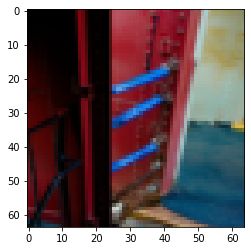

In [ ]:
# Пример изображения
index = 45
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", это класс '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' изображений.")

y = [0], это класс 'non-cat' изображений.


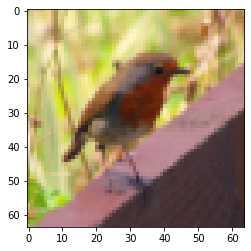

In [ ]:
index = 10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", это класс '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' изображений.")

Найдите значения следующих парамеров датасета:
* `m_train` - число обучающих примеров
* `m_test` - число тестовых примеров
* `num_px` - ширина изображения
* `num_py` - высота изображения

`train_set_x_orig` является numpy-тензором размером `(m_train, num_py, num_px, 3)`.

In [ ]:
# YOUR CODE HERE
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = test_set_x_orig.shape[1]
num_py = test_set_x_orig.shape[2]

print ("Количество обучающих примеров: m_train = " + str(m_train))
print ("Количество тестовых примеров: m_test = " + str(m_test))
print ("Ширина изображения: num_px = " + str(num_px))
print ("Высота изображения: num_py = " + str(num_py))
print ("Форма массива изображения: (" + str(num_py) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Количество обучающих примеров: m_train = 209
Количество тестовых примеров: m_test = 50
Ширина изображения: num_px = 64
Высота изображения: num_py = 64
Форма массива изображения: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


Сначала измените форму тензора изображения (num_py, num_px, 3) на numpy-тензор формой (num_py $*$ num_px $*$ 3, 1), где каждый столбец будет соотвествовать изображению.

Преобразование вектора X размером (a,b,c,d) в матрицу X_flatten размером (b$*$c$*$d, a) можно осуществить следующим образом: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [ ]:
# Измените форму тренировочного и тестового набора

# YOUR CODE HERE
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten =  test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [ ]:
# Проверка правильности измнения формы массивов
assert np.array_equal(train_set_x_flatten[0:5,0],np.array([17, 31, 56, 22, 33]))

Для представления изображений в цветовой системе RGB значение каждого пикселя представляет собой вектор из трех чисел в диапазоне от 0 до 255.

Было бы проблематично передать в нейронную сеть значения, имеющие самые разные диапазоны. Сеть, конечно, сможет автоматически адаптироваться к таким разнородным данным, однако это усложнит обучение. На практике Одним из распространенных шагов предварительной обработки в машинном обучении является нормализация: для каждого признака во входных данных 
(столбца в матрице входных данных) из каждого значения вычитается среднее по этому признаку, и разность делится на стандартное отклонение, в результате признак центрируется по нулевому значению и имеет стандартное отклонение, равное единице. Такую нормализацию легко выполнить с помощью Numpy.

Для нашего набора изображений просто разделим каждую строку набора данных на 255 (максимальное значение пиксельного канала).

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>
**Промежуточные итоги:**

Распространенными шагами предварительной обработки данных являются:
- Определение числа и исходных размеров входных данных (m_train, m_test, num_px, ...)
- Измение формы набора данных таким образом, чтобы каждый пример представлял собой вектор-столбец
- Нормализация данных

## 3 - Модель нейронной сети ##

Многослойные персептроны (MLP) также называют простыми нейронными сетями прямого распространения, а иногда и просто нейронными сетями. MLP можно рассматривать как обобщение линейных моделей, которое прежде чем прийти к решению выполняет несколько этапов обработки данных. Следующее изображение объясняет, почему **Логистическая регрессия является очень простой нейронной сетью!**

<img src="https://drive.google.com/uc?id=1K0yi6aYhxJZ4vy0sRnux1mJ_8MSl1lBN" width=70%>

**Математическая формулировка**:

Для одного экземпляра обучения $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

Функция стоимости рассчитывается путем суммирования всех стоимостей примеров обучения:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Задачи**:
В этом упражнении необходимо выполнить следующие шаги:
     - инициализировать параметры модели
     - изучить параметры модели, обучить модель, минимизировав стоимость
     - использовать обученную модель для прогнозирования (на тестовом наборе)
     - проанализировать результаты и сделать вывод

## 4 - Построение алгоритма ## 

Основными шагами для для построения нейронной сети являются:
1. Определение архитектуры сети (число входных признаков, нейронов) 
2. Инициализация параметров сети
3. Обучение в виде цикла:
    - Рассчет ошибки итерации (прямое распространение ошибки)
    - Расчет градиента ошибки (обатное распространение ошибки)
    - Обновление параметров сети (градиентный спуск)

Вам необходимо реализовать пункты 1-3 отдельными функциями и затем соединить их в функции `model()`.

### 4.1 - Сигмоидальная функция активации

**Задание**: Реализуйте сигмоидальную функцию `sigmoid()`, вычисляющую $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$. Используйте np.exp().

In [ ]:
# Функция активации: sigmoid

def sigmoid(z):
    # YOUR CODE HERE
    s = 1/(1 + np.exp(-z))
    
    return s

In [ ]:
assert sigmoid(np.array([0,2]))[0] == 0.5
assert round(sigmoid(np.array([0,2]))[1], 6) == 0.880797

### 4.2 - Инициализация параметров
**Задание:** Реализуйте инициализацию весовых коэффициентов нулями, используя np.zeros().

In [ ]:
# Инициализация нулями: initialize_with_zeros

def initialize_with_zeros(dim):
  
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
assert np.array_equal(w,np.array([[0.],[0.]]))
assert np.array_equal(b,0)

### 4.3 - Прямое и обратное распространение ошибки

Наиболее известный алгоритм обучения нейронной сети - метод обратного распространения ошибки. 
Данный алгоритм используется для минимизации отклонения реальных значений выходных сигналов нейронной сети от требуемых. 

**Задание:** Реализуйте функцию `propagate()`, которая вычисляет функцию стоимости и ее градиент.

**Подсказки**:

Прямое распространение сигнала:
- Предъявление очередного экземпляра Х из обучающей выборки на вход нейронной сети
- Вычисление выходного сигнала $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Определение величин ошибок нейронов выходного слоя: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Формулы для обратного распространения ошибки: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
# Прямое и обратное распространение ошибки: propagate

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    # YOUR CODE HERE
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)           
    cost = -1./m* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1./m*np.dot(X, (A-Y).T)
    db = 1./m*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)

assert np.round(grads["dw"])[0] == 1
assert np.round(grads["dw"])[1] == 2
assert np.round(grads["db"],1) == 0.5
assert np.round(cost) == 6

### 4.4 - Оптимизация

**Задание:** Напишите ниже функцию обучения, которая оптимизирует веса $w$ и смещения $b$ для минимизации функции ошибки выхода $J$. Для параметра $\theta$ реализуйте правило обновления $ \theta = \theta - \alpha \text{ } d\theta$, где $\alpha$ - скорость обучения.

In [ ]:
# Функция оптимизации: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Вычисление градиента и функции стоимости
        # YOUR CODE HERE
        grads, cost =propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        # обновление весов
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

pw = params["w"]
pb = params["b"]
assert np.round(pw,5)[0] == 0.11246
assert np.round(pw,5)[1] == 0.23107
assert np.round(pb,5) == 1.55930

assert np.round(grads["dw"],5)[0] == 0.90158
assert np.round(grads["dw"],5)[1] == 1.76251
assert np.round(grads["db"],5) == 0.43046

**Задание:** Предыдущая функция обучения позволяет подобрать параметры весов w и смещений b нейронов сети. Используйте обученные параметры для предсказания класса экземпляра входных данных X. Реализуйте функцию `predict()`, состоящую из следующих шагов:

1. Вычисление $\hat{Y} = A = \sigma(w^T X + b)$

2. Присвоение метки класса для значения a: если значение функции активации <= 0.5, то 0, иначе 1 (активация > 0.5). запись результата классификации в вектор `Y_prediction`. 

In [ ]:
# Функция классификации: predict

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Вычислите вектор "A"
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        
        # Произведите классификацию с помощью порогового значения 0.5
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
             Y_prediction[0, i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
assert np.array_equal(predict(w, b, X),np.array([[1.,1.]]))

<font color='blue'>
**Промежуточные итоги:**

Основными шагами для классификации нейронной сетью являются:
* Инициализация начальных значений параметров сети (w,b)
* Итерационная оптимизация функции ошибки путем обучения параметров (w,b):
  *   вычисление функции стоимости и ее градиента
  *   обновление значений параметров используя метод градиентного спуска
* Классификация набора данных с использованием обученных (w,b)

## 5 - Создание классификатора ##

После того, как реализованы все базовые функции, создадим классификатор на основе неронной сети.

**Задание:** Реализуйте функцию `model()`:
    - Y_prediction_test используйте для тестирования модели на тестовом наборе
    - Y_prediction_train используйте для тестирования модели на тренировочном наборе
    - w, costs, grads - результат фнкции optimize()

In [ ]:
# Модель классификатора: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    # инициализация параметов (w, b)
    # YOUR CODE HERE
    w, b = initialize_with_zeros(X_train.shape[0])

    # Градиентный спуск
    # YOUR CODE HERE
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
        
    # Предсказание Y_prediction_test, Y_prediction_train 
    # YOUR CODE HERE
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
# Обучим полученную модель
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Примерные результаты**: 

<table style="width:40%"> 

    <tr>
        <td> **Ошибка после 0 итерации **  </td> 
        <td> 0.693147 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td> **Точность на обучающей выборке**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>

    <tr>
        <td>**Точность на тестовой выборке** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 


** Комментарий **: точность обучения модели на тренировочном модели стремиться к 100%, что означает, что модель работает и имеет достаточно хорошее соответствие данным обучения. Точность реализованного классификатора на тестовом наборе приблизительно составляет 68%, что неплохо для такой линейной модели, как логистическая регрессия, а также обученной на маленьком наборе данных. В последующих лабоаторных работах Вам предстоить усложнить нейронную сеть и создать более точный классификатор!

Позже Вы узнаете, как бороться с переобучением, например, с помощью регуляризации, а пока можете проверить результаты обучения модели, используя приведенный ниже код (и изменяя переменную `index`). Посмотрите результаты классификации на изображениях тестового набора.

y = 0, предсказание нейросети: "non-cat" на изображении.


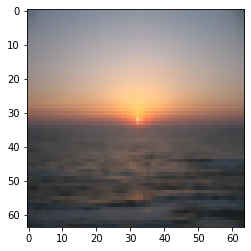

In [ ]:
index = 35
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", предсказание нейросети: \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" на изображении.")

Построим график обучения сети: график зависимости функции стоимости от времени обучения 

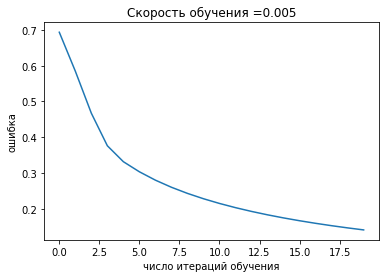

In [ ]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('ошибка')
plt.xlabel('число итераций обучения')
plt.title("Скорость обучения =" + str(d["learning_rate"]))
plt.show()

Пояснение: график потерь в результате обучения стремиться к 0, что говорит о том, что модель обучается и все больше соотвествует данным. Однако с увеличением количества эпох обучения модель начинает подстраиваться под обучающие данные, "запоминать" тренировочный набор, однако это приводит зачастую к тому, что точность на тестовом наборе уменьшается. Выражаясь точнее, происходит переобучение: чрезмерная оптимизация на обучающих данных, что приводит к представлению, характерному для обучающих данных, не обобщающее данные за пределами обучающего набора. 


## 6 - Настройка гиперпараметров ##

Установите экспериментально значение параметра скорости обучения модели, протестировав обучение с различными $\alpha$.

#### Выбор скорости обучения ####

** Пояснение **: для того, чтобы метод градиентого спуска приводил к оптимизации модели, а не расходился или застревал в локальных минимумах, следует осознано подбирать параметр скорости обучения. Скорость обучения $ \ alpha $ определяет, насколько быстро мы обновляем параметры. Если скорость обучения слишком велика, градиентный спуск может «перепрыгнуть» оптимальное значение. Точно так же, если скорость слишком мала, для обучения потребуется огромное число итераций. Вот почему важно обращать внимание на скорость обучения.

Сравните кривую обучения модели с несколькими вариантами скорости обучения и сделайте выводы. Не стесняйтесь также попробовать значения, отличные от заданных для переменной `learning_rates`.

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



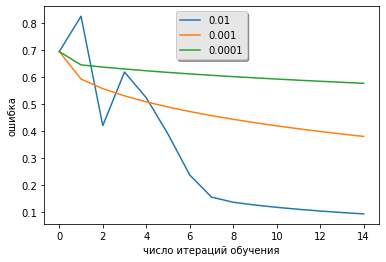

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('ошибка')
plt.xlabel('число итераций обучения')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## 7 - Тестирование произвольных изображений ##

Вы можете использовать произвольные изображения для того, чтобы оценить полученную нейронную сеть. Для этого:
    1. Загрузите изображение в директрию images данного Jupyter Notebook
    3. Измените переменную my_name на имя загруженного изображения
    4. Запустите ячейку кода и оцените результат (1 = cat, 0 = non-cat)!

y = 1.0, предсказание нейросети: "cat" на изображении.


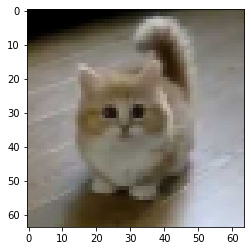

In [ ]:
from skimage import transform
from skimage.io import imread

"""my_image = Укажите имя вашего изображения в папке images"""
# YOUR CODE HERE
my_image = "my_image_cat.jpg"

# Загрузка указанного изображения
fname =  my_image
image = np.array(imread(fname))

# Предобработка и изменение размера изображения
image = image/255.
image = transform.resize(image, [num_py,num_px,3])
my_image = image.reshape((1, num_py*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", предсказание нейросети: \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" на изображении.")